In [3]:
#pip install ultralytics
#pip install opencv-python
#pip install numpy
#pip install easyocr



Loading YOLO model...


Using CPU. Note: This module is much faster with a GPU.


Running YOLO detection...
❌ No license plates detected.


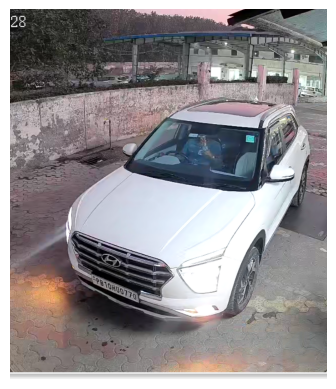

✅ Done.


In [2]:
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\crop3.png"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.5, iou=0.4, verbose=False)

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = box
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

            # Crop and preprocess
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.bilateralFilter(gray, 9, 75, 75)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # OCR
            text_results = reader.readtext(thresh, detail=0)
            for text in text_results:
                text_clean = re.sub(r'[^A-Z0-9]', '', text.upper())
                if len(text_clean) >= 6:
                    print(f"Detected Plate (raw): {text_clean}")

            # Draw box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")
# this is  not able to 

Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model...
Running YOLO detection...


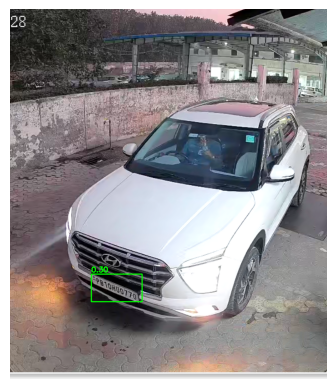

✅ Done.


In [4]:
# tried lowering down the conf threshold 
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\crop3.png"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, verbose=False)

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = box
            x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

            # Crop and preprocess
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            

            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.bilateralFilter(gray, 9, 75, 75)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # OCR
            text_results = reader.readtext(thresh, detail=0)
            for text in text_results:
                text_clean = re.sub(r'[^A-Z0-9]', '', text.upper())
                if len(text_clean) >= 6:
                    print(f"Detected Plate (raw): {text_clean}")

            # Draw box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")
# this detected teh plate but not the reading part got success

Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model...
Running YOLO detection...


D:\Car Plate Detection\env\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


🟩 Detected Plate: 6R810MU0770


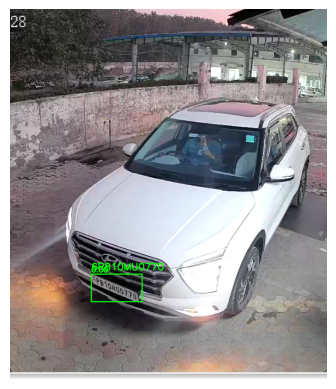

✅ Done.


In [6]:
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\crop3.png"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------

print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Try both grayscale & threshold for OCR
            ocr_inputs = [gray, thresh]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = re.sub(r'[^A-Z0-9]', '', text_found.upper())
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")


Loading YOLO model...


Using CPU. Note: This module is much faster with a GPU.


Running YOLO detection...
🟩 Detected Plate: P8654T5646


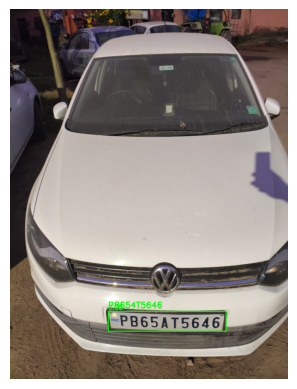

✅ Done.


In [10]:
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# Character substitution map (for OCR correction)
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    """Fix common OCR mistakes and match Indian plate pattern."""
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    # Apply substitution corrections
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])

    # Try to match Indian plate pattern (loose)
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        # Sometimes one more substitution helps
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            # Try multiple variants for OCR
            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    # Pick the longest likely candidate
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")


Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model...
Running YOLO detection...
🟩 Detected Plate: BG5A75


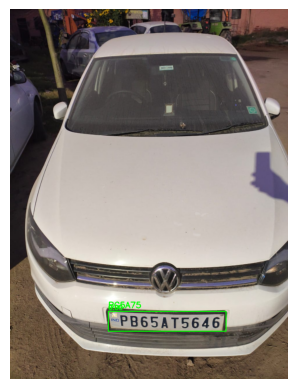

✅ Done.


In [11]:
# added more functionality to teh corected map for readability accuracy 
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# Character substitution map (for OCR correction)
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

# def correct_text(text):
#     """Fix common OCR mistakes and match Indian plate pattern."""
#     text = re.sub(r'[^A-Z0-9]', '', text.upper())
#     # Apply substitution corrections
#     corrected = ''.join([subs_map.get(ch, ch) for ch in text])

#     # Try to match Indian plate pattern (loose)
#     pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
#     if not re.fullmatch(pattern, corrected):
#         # Sometimes one more substitution helps
#         for k, v in subs_map.items():
#             corrected = corrected.replace(k, v)
#     return corrected



# prev function removed replaced with 
#--------------------------------------------------------
def correct_text(text):
    """
    Correct OCR misreads in Indian-style license plates.
    Example: 'P8654T5646' -> 'PB65AT5646'
    """
    text = re.sub(r'[^A-Z0-9]', '', text.upper())

    # 1️⃣ Initial substitution map for common OCR mistakes
    subs_map = {
        '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
        '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
        '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'T': '7', '7': 'T'
    }
    text = ''.join([subs_map.get(ch, ch) for ch in text])

    # 2️⃣ Try to fix structure of Indian plate
    # Typical format: [State][District][Series][Number]
    # Example: PB65AT5646
    # -> 2 letters + 1–2 digits + 1–2 letters + 1–4 digits

    # Replace likely number/letter swaps based on position
    chars = list(text)
    for i, ch in enumerate(chars):
        if i < 2:  # State code → should be LETTERS
            if ch.isdigit():
                chars[i] = {'8': 'B', '6': 'B', '0': 'O', '1': 'I', '5': 'S'}.get(ch, ch)
        elif 2 <= i <= 3:  # District → should be DIGITS
            if ch.isalpha():
                chars[i] = {'B': '8', 'O': '0', 'I': '1', 'S': '5', 'Z': '2'}.get(ch, ch)
        elif 4 <= i <= 5:  # Series → LETTERS again
            if ch.isdigit():
                chars[i] = {'8': 'B', '6': 'G', '4': 'A', '0': 'O'}.get(ch, ch)
        # Last part (number) can stay as-is
    corrected = ''.join(chars)

    # 3️⃣ Ensure uppercase and pattern match
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    match = re.search(pattern, corrected)
    if match:
        corrected = match.group(0)

    return corrected

#--------------------------------------------------------

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            # Try multiple variants for OCR
            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    # Pick the longest likely candidate
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")


Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model...
Running YOLO detection...
🟩 Detected Plate: BG5AT5


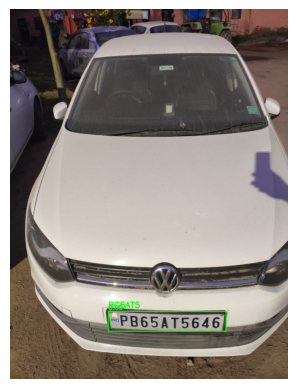

✅ Done.


In [12]:
# added more functionality to teh corected map for readability accuracy 
import cv2
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# Character substitution map (for OCR correction)
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

# def correct_text(text):
#     """Fix common OCR mistakes and match Indian plate pattern."""
#     text = re.sub(r'[^A-Z0-9]', '', text.upper())
#     # Apply substitution corrections
#     corrected = ''.join([subs_map.get(ch, ch) for ch in text])

#     # Try to match Indian plate pattern (loose)
#     pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
#     if not re.fullmatch(pattern, corrected):
#         # Sometimes one more substitution helps
#         for k, v in subs_map.items():
#             corrected = corrected.replace(k, v)
#     return corrected



# prev function removed replaced with 
#--------------------------------------------------------
# def correct_text(text):
#     """
#     Correct OCR misreads in Indian-style license plates.
#     Example: 'P8654T5646' -> 'PB65AT5646'
#     """
#     text = re.sub(r'[^A-Z0-9]', '', text.upper())

#     # 1️⃣ Initial substitution map for common OCR mistakes
#     subs_map = {
#         '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
#         '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
#         '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'T': '7', '7': 'T'
#     }
#     text = ''.join([subs_map.get(ch, ch) for ch in text])

#     # 2️⃣ Try to fix structure of Indian plate
#     # Typical format: [State][District][Series][Number]
#     # Example: PB65AT5646
#     # -> 2 letters + 1–2 digits + 1–2 letters + 1–4 digits

#     # Replace likely number/letter swaps based on position
#     chars = list(text)
#     for i, ch in enumerate(chars):
#         if i < 2:  # State code → should be LETTERS
#             if ch.isdigit():
#                 chars[i] = {'8': 'B', '6': 'B', '0': 'O', '1': 'I', '5': 'S'}.get(ch, ch)
#         elif 2 <= i <= 3:  # District → should be DIGITS
#             if ch.isalpha():
#                 chars[i] = {'B': '8', 'O': '0', 'I': '1', 'S': '5', 'Z': '2'}.get(ch, ch)
#         elif 4 <= i <= 5:  # Series → LETTERS again
#             if ch.isdigit():
#                 chars[i] = {'8': 'B', '6': 'G', '4': 'A', '0': 'O'}.get(ch, ch)
#         # Last part (number) can stay as-is
#     corrected = ''.join(chars)

#     # 3️⃣ Ensure uppercase and pattern match
#     pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
#     match = re.search(pattern, corrected)
#     if match:
#         corrected = match.group(0)

#     return corrected
#----------------------------------------------------
 # upper function failed 
#--------------------------------------------------------
def correct_text(text):
    """
    Smarter correction for Indian vehicle plates.
    Handles both full and partial detections gracefully.
    """
    if not text:
        return ""

    text = re.sub(r'[^A-Z0-9]', '', text.upper())

    # Skip if OCR result is too short to be a valid plate
    if len(text) < 6:
        return text

    # Common OCR confusion map
    subs_map = {
        '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
        '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
        '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
    }

    # Apply substitutions cautiously
    text = ''.join([subs_map.get(ch, ch) for ch in text])

    # If the text is long enough, attempt structure-based correction
    if len(text) >= 8:
        chars = list(text)
        for i, ch in enumerate(chars):
            if i < 2:  # First two should be letters (State)
                if ch.isdigit():
                    chars[i] = {'8': 'B', '6': 'B', '0': 'O', '1': 'I', '5': 'S'}.get(ch, ch)
            elif 2 <= i <= 3:  # District (numbers)
                if ch.isalpha():
                    chars[i] = {'B': '8', 'O': '0', 'I': '1', 'S': '5', 'Z': '2'}.get(ch, ch)
            elif 4 <= i <= 5:  # Series (letters)
                if ch.isdigit():
                    chars[i] = {'8': 'B', '6': 'G', '4': 'A', '0': 'O'}.get(ch, ch)
        text = ''.join(chars)

    # Try to match Indian format
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    match = re.search(pattern, text)
    if match:
        return match.group(0)
    else:
        # If nothing matches, just return cleaned text
        return text


if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            # Try multiple variants for OCR
            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    # Pick the longest likely candidate
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")


Loading YOLO model...


Using CPU. Note: This module is much faster with a GPU.


Running YOLO detection...
🟩 Detected Plate: 6R810MU0770


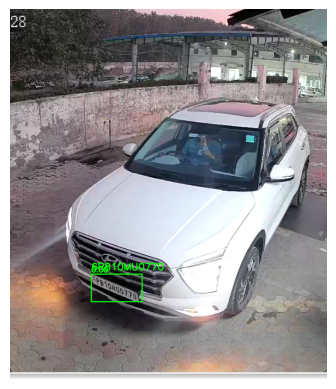

✅ Done.


In [16]:
 # code giving best output with readability and   best results with our offoce input data not with  site camera input 
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
# image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\crop3.png"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# Character substitution map (for OCR correction)
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    """Fix common OCR mistakes and match Indian plate pattern."""
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    # Apply substitution corrections
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])

    # Try to match Indian plate pattern (loose)
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        # Sometimes one more substitution helps
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            # Try multiple variants for OCR
            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    # Pick the longest likely candidate
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.") 


Using CPU. Note: This module is much faster with a GPU.


Loading YOLO model...
Running YOLO detection...
🟩 Detected Plate: P8654T5646


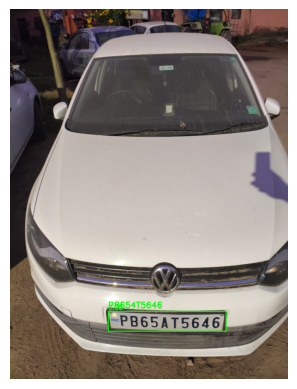

✅ Done.


In [18]:
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
# code giving best output with readability and best results with our offoce input data not with  site camera input 
import re
import numpy as np
from ultralytics import YOLO
import easyocr
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLOv8 plate detector
# -----------------------------
print("Loading YOLO model...")
model = YOLO("LP-detection.pt")

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
# image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\crop3.png"
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detection
# -----------------------------
print("Running YOLO detection...")
results = model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# Character substitution map (for OCR correction)
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    """Fix common OCR mistakes and match Indian plate pattern."""
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    # Apply substitution corrections
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])

    # Try to match Indian plate pattern (loose)
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        # Sometimes one more substitution helps
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(results) == 0 or len(results[0].boxes) == 0:
    print("❌ No license plates detected.")
else:
    for r in results:
        boxes = r.boxes.data.cpu().numpy()

        for box in boxes:
            x1, y1, x2, y2, conf, cls = map(int, box[:6])
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # --- Improved OCR preprocessing ---
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            # Try multiple variants for OCR
            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    # Pick the longest likely candidate
                    text_found = max(ocr_result, key=len)
                    break

            # --- Postprocess text ---
            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# -----------------------------
# 5. Show results
# -----------------------------
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

cv2.destroyAllWindows()
print("✅ Done.") 


Loading YOLO models...


Using CPU. Note: This module is much faster with a GPU.


Running detections...
🟩 Detected Plate: P8654T5646


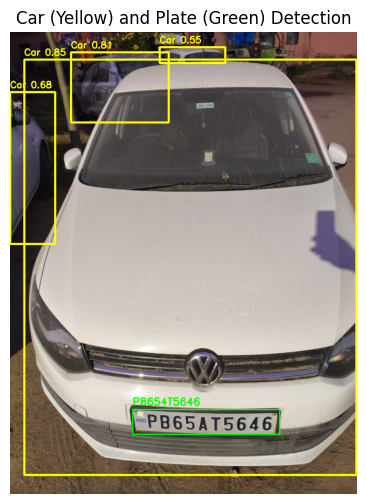

✅ Done.


In [19]:
# tryig to deetct the car also and drawing a green binding box 
import re
import numpy as np
from ultralytics import YOLO
import easyocr
import cv2
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLO models
# -----------------------------
print("Loading YOLO models...")
plate_model = YOLO("LP-detection.pt")        # your trained plate detector
car_model = YOLO("yolov8n.pt")               # for car detection

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detections
# -----------------------------
print("Running detections...")

# Detect cars (COCO model - class 2 is car)
car_results = car_model.predict(source=img, conf=0.35, iou=0.45, imgsz=640, verbose=False)

# Detect license plates
plate_results = plate_model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# -----------------------------
# 5. Process car detections
# -----------------------------
if len(car_results) > 0 and len(car_results[0].boxes) > 0:
    for r in car_results:
        for box in r.boxes:
            cls_id = int(box.cls[0].item())
            conf = float(box.conf[0].item())
            # COCO class 2 = car
            if cls_id == 2:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 3)  # Yellow
                cv2.putText(img, f"Car {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
else:
    print("⚠️ No cars detected.")

# -----------------------------
# 6. Process plate detections + OCR
# -----------------------------
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(plate_results) > 0 and len(plate_results[0].boxes) > 0:
    for r in plate_results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0].item())
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # Preprocess
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    text_found = max(ocr_result, key=len)
                    break

            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw plate box (green)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("❌ No license plates detected.")

# -----------------------------
# 7. Show results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Car (Yellow) and Plate (Green) Detection")
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")
# this made multiple cars / needs to be ammeded for cars detection 

Loading YOLO models...


Using CPU. Note: This module is much faster with a GPU.


Running detections...
🟩 Detected Plate: P8654T5646


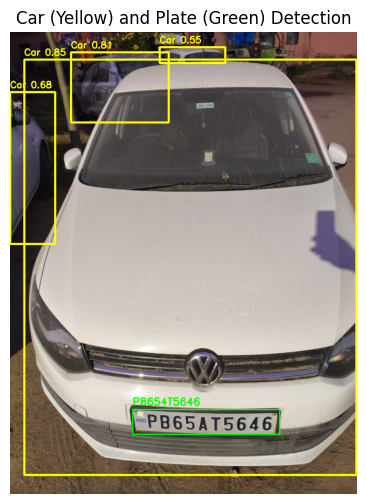

✅ Done.
🟩 Detected Plate: P8654T5646


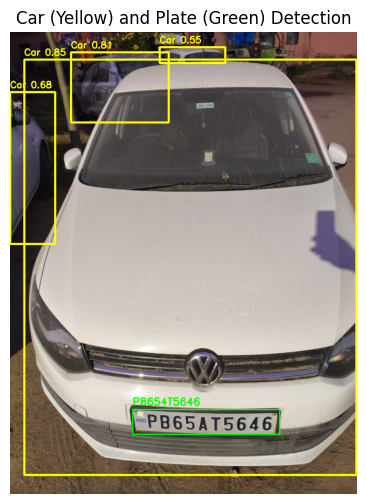

✅ Done.


In [23]:

import re
import numpy as np
from ultralytics import YOLO
import easyocr
import cv2
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLO models
# -----------------------------
print("Loading YOLO models...")
plate_model = YOLO("LP-detection.pt")        # your trained plate detector
car_model = YOLO("yolov8n.pt")               # for car detection

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
image_path = r"C:\Users\ADMIN\Desktop\pic_data\Testing Data\PB5646.jpg"
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Optional resize if huge
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detections
# -----------------------------
print("Running detections...")

# Detect cars (COCO model - class 2 is car)
car_results = car_model.predict(source=img, conf=0.35, iou=0.45, imgsz=640, verbose=False)

# Detect license plates
plate_results = plate_model.predict(source=img, conf=0.25, iou=0.45, imgsz=640, verbose=False)

# -----------------------------
# 5. Process car detections
# -----------------------------
if len(car_results) > 0 and len(car_results[0].boxes) > 0:
    for r in car_results:
        for box in r.boxes:
            cls_id = int(box.cls[0].item())
            conf = float(box.conf[0].item())
            # COCO class 2 = car
            if cls_id == 2:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 3)  # Yellow
                cv2.putText(img, f"Car {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
else:
    print("⚠️ No cars detected.")

# -----------------------------
# 6. Process plate detections + OCR
# -----------------------------
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(plate_results) > 0 and len(plate_results[0].boxes) > 0:
    for r in plate_results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0].item())
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # Preprocess
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    text_found = max(ocr_result, key=len)
                    break

            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw plate box (green)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("❌ No license plates detected.")

# -----------------------------
# 7. Show results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Car (Yellow) and Plate (Green) Detection")
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")
# this made multiple cars / needs to be ammeded for cars detection 

# -----------------------------
# 6. Process plate detections + OCR
# -----------------------------
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected

if len(plate_results) > 0 and len(plate_results[0].boxes) > 0:
    for r in plate_results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0].item())
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # Preprocess
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

            ocr_inputs = [gray, thresh, adaptive]
            text_found = None
            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    text_found = max(ocr_result, key=len)
                    break

            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            else:
                print("⚠️ OCR failed on this plate.")

            # Draw plate box (green)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
else:
    print("❌ No license plates detected.")

# -----------------------------
# 7. Show results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Car (Yellow) and Plate (Green) Detection")
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")


Loading YOLO models...


Using CPU. Note: This module is much faster with a GPU.


Running detections...
🟩 Cars detected after filtering: 1
❌ No license plates detected.


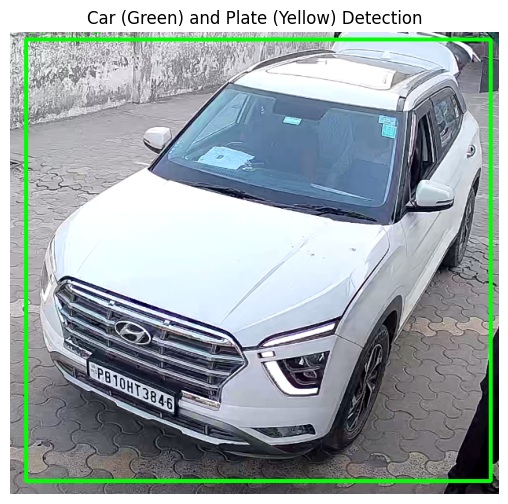

✅ Done.


In [32]:
import re
import numpy as np
from ultralytics import YOLO
import easyocr
import cv2
from matplotlib import pyplot as plt
import torch

# -----------------------------
# 1. Load YOLO models
# -----------------------------
print("Loading YOLO models...")
plate_model = YOLO("LP-detection.pt")        # License Plate detection model
car_model = YOLO("yolov8n.pt")               # General car detection model

# -----------------------------
# 2. Initialize EasyOCR
# -----------------------------
reader = easyocr.Reader(['en'], gpu=False)

# -----------------------------
# 3. Load image
# -----------------------------
# Test images and notes:
# "PB5646.jpg"  → good accuracy, car+plate detected, OCR ~90% readable
# "crop3.png"   → plate+car OK, OCR failed
# "crop2.png"   → no car/plate detected
# "crop4.png"   → car detected, no plate

image_path = r"\\DESKTOP-2F2VFO8\shared_folder\testing_data\cars\Untitled_cc.png"

img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"❌ Could not load image: {image_path}")

# Resize if too large
if img.shape[0] > 1080:
    scale = 1080 / img.shape[0]
    img = cv2.resize(img, None, fx=scale, fy=scale)

# -----------------------------
# 4. Run YOLO detections
# -----------------------------
print("Running detections...")
car_results = car_model.predict(source=img, conf=0.4, iou=0.45, imgsz=640, verbose=False)
plate_results = plate_model.predict(
    source=img,
    conf=0.20,        # lower threshold slightly
    iou=0.45,
    imgsz=960,        # bigger image size → more plate detail
    verbose=False
)

# -----------------------------
# 5. Process car detections (apply filtering)
# -----------------------------
def nms(boxes, iou_thresh=0.4):
    """Manual Non-Maximum Suppression to remove overlapping car boxes."""
    if len(boxes) == 0:
        return []
    boxes = sorted(boxes, key=lambda x: x[4], reverse=True)
    filtered = []
    while boxes:
        chosen = boxes.pop(0)
        filtered.append(chosen)
        boxes = [
            b for b in boxes
            if (lambda iou: iou < iou_thresh)(
                (max(0, min(chosen[2], b[2]) - max(chosen[0], b[0])) *
                 max(0, min(chosen[3], b[3]) - max(chosen[1], b[1]))) /
                ((chosen[2]-chosen[0])*(chosen[3]-chosen[1]) +
                 (b[2]-b[0])*(b[3]-b[1]) -
                 (max(0, min(chosen[2], b[2]) - max(chosen[0], b[0])) *
                  max(0, min(chosen[3], b[3]) - max(chosen[1], b[1]))))
            )
        ]
    return filtered


# Collect all car boxes
all_car_boxes = []
if len(car_results) > 0 and len(car_results[0].boxes) > 0:
    for r in car_results:
        for box in r.boxes:
            cls_id = int(box.cls[0].item())
            conf = float(box.conf[0].item())
            if cls_id == 2:  # COCO class 2 = car
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                all_car_boxes.append([x1, y1, x2, y2, conf])

    filtered_cars = nms(all_car_boxes, iou_thresh=0.3)

    # Keep only big enough detections
    img_h, img_w = img.shape[:2]
    min_area = (img_w * img_h) * 0.03
    final_cars = [b for b in filtered_cars if (b[2]-b[0])*(b[3]-b[1]) > min_area]

    for x1, y1, x2, y2, conf in final_cars:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # 🟩 Green car box
        cv2.putText(img, f"Car {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    print(f"🟩 Cars detected after filtering: {len(final_cars)}")
else:
    print("⚠️ No cars detected.")

# -----------------------------
# 6. Process plate detections + OCR
# -----------------------------
subs_map = {
    '0': 'O', 'O': '0', '1': 'I', 'I': '1', '8': 'B', 'B': '8',
    '6': 'G', 'G': '6', '5': 'S', 'S': '5', '2': 'Z', 'Z': '2',
    '4': 'A', 'A': '4', 'U': 'V', 'V': 'U', 'Q': '0'
}

def correct_text(text):
    """Fix OCR mistakes & match Indian number plate format."""
    text = re.sub(r'[^A-Z0-9]', '', text.upper())
    corrected = ''.join([subs_map.get(ch, ch) for ch in text])
    pattern = r'[A-Z]{2}\d{1,2}[A-Z]{1,2}\d{1,4}'
    if not re.fullmatch(pattern, corrected):
        for k, v in subs_map.items():
            corrected = corrected.replace(k, v)
    return corrected


if len(plate_results) > 0 and len(plate_results[0].boxes) > 0:
    for r in plate_results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = float(box.conf[0].item())
            plate_crop = img[y1:y2, x1:x2]
            if plate_crop.size == 0:
                continue

            # 🔹 Preprocessing for better OCR
            gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, None, fx=2.5, fy=2.5, interpolation=cv2.INTER_CUBIC)
            gray = cv2.GaussianBlur(gray, (3, 3), 0)
            gray = cv2.equalizeHist(gray)
            gray = cv2.bilateralFilter(gray, 9, 75, 75)          # noise reduction
            gray = cv2.convertScaleAbs(gray, alpha=1.5, beta=15) # contrast boost
            kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])
            gray = cv2.filter2D(gray, -1, kernel)                # sharpening

            _, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            adaptive = cv2.adaptiveThreshold(
                gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                cv2.THRESH_BINARY, 11, 2
            )

            ocr_inputs = [gray, thresh, adaptive]
            text_found = None

            for ocr_img in ocr_inputs:
                ocr_result = reader.readtext(ocr_img, detail=0, paragraph=False)
                if ocr_result:
                    text_found = max(ocr_result, key=len)
                    break

            if text_found:
                text_clean = correct_text(text_found)
                print(f"🟩 Detected Plate: {text_clean}")
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 255), 2)  # Yellow box for plate
                cv2.putText(img, text_clean, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)
            else:
                print("⚠️ OCR failed on this plate.")
else:
    print("❌ No license plates detected.")

# -----------------------------
# 7. Show results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Car (Green) and Plate (Yellow) Detection")
plt.show()

cv2.destroyAllWindows()
print("✅ Done.")
